# Most Streamed Spotify Songs 2024

Source - https://www.kaggle.com/datasets/nelgiriyewithana/most-streamed-spotify-songs-2024/data

Purpose: To compare songs streaming numbers on different platforms and find correlations between artists and song success.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\Mouth\Documents\Datasets\Most_Streamed_Spotify_Songs_2024\Most Streamed Spotify Songs 2024.csv', encoding='unicode_escape')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

In [4]:
df.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


# Data Cleaning


In [5]:
# Convert Track, Album Name, and Artist columns from object to string datatypes
df[['Track', 'Album Name', 'Artist']].dtypes

Track         object
Album Name    object
Artist        object
dtype: object

In [6]:
df['Track'] = df['Track'].astype('string')
df['Album Name'] = df['Album Name'].astype('string')
df['Artist'] = df['Artist'].astype('string')

df[['Track', 'Album Name', 'Artist']].dtypes

Track         string
Album Name    string
Artist        string
dtype: object

In [7]:
# Investigate the 5 null values in the Artist column
df[df['Artist'].isna()]

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
311,Cool,JnD Mix,<NA>,5/25/2024,QZNWQ2410638,311,86.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"8,624,577",NaN,0
480,I Wanna Party,I Wanna Party - Single,<NA>,5/31/2024,QZYFZ2445017,482,70.3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1345,Marlboro Remix,Marlboro Remix - Single,<NA>,6/7/2024,QZNWT2471497,"1,343",40.6,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"504,979",NaN,0
1561,Melting,Melting - Single,<NA>,6/10/2024,QZNWU2402635,"1,553",37.2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"289,134",NaN,0
3402,La ï¿½ï¿½ltima Vez (Yo Te Per,La ï¿½ï¿½ltima Vez (Yo Te Perdï¿½ï¿½),<NA>,5/2/2024,MX2832415361,"3,381",23.6,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1,606,561",NaN,0


In [8]:
# Removing rows since I cannot find the artist name for the tracks
artist_null_index = (df[df['Artist'].isna()].index).tolist()
df_cleaned = df.drop(artist_null_index)

In [9]:
# No more null artist rows
df_cleaned['Artist'].isna().sum()

0

In the 'Track' and 'Album Name' columns there are strange characters but I won't update them because it wont affect this analysis.

In [10]:
# Convert the Release Date column from object to datetime - column is formatted as month/day/year
df_cleaned['Release Date'] = pd.to_datetime(df_cleaned['Release Date'])

In [11]:
df_cleaned['Release Date'].dtype

dtype('<M8[ns]')

In [12]:
# Convert ISRC to string
df_cleaned['ISRC'] = df_cleaned['ISRC'].astype('string')
df_cleaned['ISRC'].dtype

string[python]

In [13]:
# Convert All Time Rank from object to integer
df_cleaned['All Time Rank']

0           1
1           2
2           3
3           4
4           5
        ...  
4595    4,585
4596    4,575
4597    4,571
4598    4,591
4599    4,593
Name: All Time Rank, Length: 4595, dtype: object

In [14]:
# Since there are comma values, I am going to convert it from object to string to integer
df_cleaned['All Time Rank'] = df_cleaned['All Time Rank'].astype('string')
df_cleaned['All Time Rank'] = df_cleaned['All Time Rank'].str.replace(',', '')
df_cleaned['All Time Rank'] = df_cleaned['All Time Rank'].astype('int64')

In [15]:
df_cleaned['All Time Rank'].dtype

dtype('int64')

In [16]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4595 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Track                       4595 non-null   string        
 1   Album Name                  4595 non-null   string        
 2   Artist                      4595 non-null   string        
 3   Release Date                4595 non-null   datetime64[ns]
 4   ISRC                        4595 non-null   string        
 5   All Time Rank               4595 non-null   int64         
 6   Track Score                 4595 non-null   float64       
 7   Spotify Streams             4487 non-null   object        
 8   Spotify Playlist Count      4530 non-null   object        
 9   Spotify Playlist Reach      4528 non-null   object        
 10  Spotify Popularity          3796 non-null   float64       
 11  YouTube Views               4292 non-null   object      

In [17]:
# Investigate nulls in Spotify Streams column
df_cleaned[df_cleaned['Spotify Streams'].isna()]

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
24,Future,Future,official sound studio,2024-01-10,RUA1H2415548,25,277.5,NaN,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
57,Dona Felicidade,Dona Felicidade,Patati Patatï¿,2024-06-04,QZNJW2423715,58,190.0,NaN,2,"41,206",...,NaN,1.0,"1,657",NaN,NaN,NaN,NaN,NaN,NaN,0
60,Stereo Love - Melodic,Stereo Love Deluxe (feat. Vika Jigulina),Edward Maya,2024-06-05,ROCMA2413380,61,187.9,NaN,2,135,...,NaN,NaN,NaN,NaN,"420,235,997","885,123",NaN,NaN,NaN,0
76,Laxed ï¿½ï¿½ï¿½ Sire,Laxed (Siren Beat),Jawsh 685,2020-04-24,NZAM02001128,77,168.9,NaN,"10,230","1,142,937",...,NaN,NaN,NaN,NaN,"5,678,792",NaN,NaN,NaN,NaN,0
117,Chegou a Hora de Ir para Cama (Playback),3 Palavrinhas Vol.9 (Playback),3 Palavrinhas,2024-06-04,BXT622400190,118,142.4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4534,"Mast Malang Jhoom (From ""Bade Miyan Chote Miya...","Mast Malang Jhoom (From ""Bade Miyan Chote Miya...",Vishal Mishra,2024-03-01,INZ031414619,4506,19.6,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,0
4541,Hood By Air Freestyle,Hood By Air Freestyle - Single,Baby Flaco,2024-04-26,QZLMG2000292,4498,19.6,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1,526,440",NaN,0
4560,Supera,Sertanejo Para Danï¿½ï,Marï¿½ï¿½lia Mendo,2021-03-05,FR0Z50062905,4552,19.5,NaN,2,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4572,TV Shapes,TV Shapes,Bubbatrees,2022-08-19,UKSWX1900031,4536,19.5,NaN,3,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,0


In [18]:
# Fill null values in Spotify Streams column with 0 to indicate the value is not available and so it won't affect analysis
df_cleaned['Spotify Streams'] = df_cleaned['Spotify Streams'].fillna(0)

In [19]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4595 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Track                       4595 non-null   string        
 1   Album Name                  4595 non-null   string        
 2   Artist                      4595 non-null   string        
 3   Release Date                4595 non-null   datetime64[ns]
 4   ISRC                        4595 non-null   string        
 5   All Time Rank               4595 non-null   int64         
 6   Track Score                 4595 non-null   float64       
 7   Spotify Streams             4595 non-null   object        
 8   Spotify Playlist Count      4530 non-null   object        
 9   Spotify Playlist Reach      4528 non-null   object        
 10  Spotify Popularity          3796 non-null   float64       
 11  YouTube Views               4292 non-null   object      

In [20]:
# Convert Spotify Streams from object to string to int64
df_cleaned['Spotify Streams'] = df_cleaned['Spotify Streams'].astype('string')
df_cleaned['Spotify Streams'] = df_cleaned['Spotify Streams'].str.replace(',', '')
df_cleaned['Spotify Streams'] = df_cleaned['Spotify Streams'].astype('int64')

df_cleaned['Spotify Streams'].dtype

dtype('int64')

In [21]:
df_cleaned[df_cleaned['Spotify Playlist Count'].isna()]

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
30,Danza Kuduro - Cover,ýýýýýýýýýýýýýýýýýýýýýýýýýýý ýýýýýýýýýýýýýýýýýý...,LOVE BGM JPN,2024-05-14,TCJPA2406007,31,249.8,1645079292,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
117,Chegou a Hora de Ir para Cama (Playback),3 Palavrinhas Vol.9 (Playback),3 Palavrinhas,2024-06-04,BXT622400190,118,142.4,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
270,California Gurls,Girl Power 2023,Katy Perry,2023-09-19,USCA21001182,271,94.2,0,NaN,NaN,...,NaN,NaN,NaN,NaN,"316,633,718","283,271",NaN,NaN,NaN,0
391,The Girl From Ipanema,Instrumental Bossa Nova,Stan Getz,2024-06-06,QZQAY2414774,391,77.2,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1,772,770",NaN,0
482,La Bebe (Remix) [Apple Music Live],Apple Music Live: Peso Pluma,Peso Pluma,2023-12-06,QMFMF2394976,480,70.2,0,NaN,NaN,...,33,NaN,NaN,NaN,NaN,NaN,NaN,"3,940",NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4459,Nature Sounds with Music: Inspiring Thunder an...,Nature Sounds with Music: Inspiring Thunder an...,Jamie Llewellyn,2013-12-27,QMBZ91375750,4438,19.8,240712,NaN,NaN,...,NaN,NaN,NaN,NaN,"1,759,451","1,996,608",NaN,NaN,NaN,0
4501,Animals,Tremor (Sensation 2014 Anthem),Martin Garrix,2014-01-01,AUNV01400494,4472,19.7,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4534,"Mast Malang Jhoom (From ""Bade Miyan Chote Miya...","Mast Malang Jhoom (From ""Bade Miyan Chote Miya...",Vishal Mishra,2024-03-01,INZ031414619,4506,19.6,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,0
4539,Cake By The Ocean - Cover,YARIRAFI MEDLEY BEST30,MUSIC LAB JPN,2023-03-29,TCJPU2360314,4507,19.6,1615456412,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [22]:
# Find other columns that need to convert object to string to int64 and create a function
df_cleaned.iloc[:, [8, 9, 10, 11, 12, 13, 14 ,15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]]

,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,Apple Music Playlist Count,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts
0,"30,716","196,631,588",92.0,"84,274,754","1,713,126","5,767,700","651,565,900","5,332,281,936","150,597,040",210.0,"40,975",684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262"
1,"28,113","174,597,137",92.0,"116,347,040","3,486,739","674,700","35,223,547","208,339,025","156,380,351",188.0,"40,778",3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279"
2,"54,331","211,607,669",92.0,"122,599,116","2,228,730","3,025,400","275,154,237","3,369,120,610","373,784,955",190.0,"74,333",536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340"
3,"269,802","136,569,078",85.0,"1,096,100,899","10,629,796","7,189,811","1,078,757,968","14,603,725,994","3,351,188,582",394.0,"1,474,799","2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942"
4,"7,223","151,469,874",88.0,"77,373,957","3,670,188","16,400",NaN,NaN,"112,763,851",182.0,"12,185",1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,"65,770","5,103,054",71.0,"149,247,747","1,397,590","48,370","20,202,000","143,934,379","53,016",3.0,6,NaN,2.0,"14,217",NaN,"20,104,066","13,184","50,633,006","656,337"
4596,"4,602","1,449,767",56.0,"943,920,245","5,347,766",NaN,"1,721","19,935","24,973,048",1.0,412,NaN,1.0,927,NaN,NaN,NaN,NaN,"193,590"
4597,"72,066","6,704,802",65.0,"201,027,333","1,081,402","7,596","5,288,677","36,849,005","29,253,152",19.0,204,NaN,1.0,74,6.0,"84,426,740","28,999",NaN,"1,135,998"
4598,"14,037","7,387,064",66.0,"1,118,595,159","3,868,828","11,433","2,534,831","37,757,301","25,150,516",1.0,"1,200",NaN,NaN,NaN,7.0,"6,817,840",NaN,NaN,"448,292"


In [23]:
# Fill all NULL values with 0 representing that the values are unavailable and so it won't affect comparisons
df_cleaned = df_cleaned.fillna(0)

In [24]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4595 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Track                       4595 non-null   string        
 1   Album Name                  4595 non-null   string        
 2   Artist                      4595 non-null   string        
 3   Release Date                4595 non-null   datetime64[ns]
 4   ISRC                        4595 non-null   string        
 5   All Time Rank               4595 non-null   int64         
 6   Track Score                 4595 non-null   float64       
 7   Spotify Streams             4595 non-null   int64         
 8   Spotify Playlist Count      4595 non-null   object        
 9   Spotify Playlist Reach      4595 non-null   object        
 10  Spotify Popularity          4595 non-null   float64       
 11  YouTube Views               4595 non-null   object      

In [25]:
# Convert columns 8-26 that are object Dtypes to string then to int64

# Find columns that are object dtypes and assign them to col_change list
col_change = []

for column in df_cleaned.columns:
    if df_cleaned.dtypes[column] == 'object':
        col_change.append(column)

for col in col_change:
    df_cleaned[col] = df_cleaned[col].astype('string')
    df_cleaned[col] = df_cleaned[col].str.replace(',', '')
    df_cleaned[col] = df_cleaned[col].astype('int64')

In [26]:
# Check if it changed dtypes to int64 and removed commas
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4595 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Track                       4595 non-null   string        
 1   Album Name                  4595 non-null   string        
 2   Artist                      4595 non-null   string        
 3   Release Date                4595 non-null   datetime64[ns]
 4   ISRC                        4595 non-null   string        
 5   All Time Rank               4595 non-null   int64         
 6   Track Score                 4595 non-null   float64       
 7   Spotify Streams             4595 non-null   int64         
 8   Spotify Playlist Count      4595 non-null   int64         
 9   Spotify Playlist Reach      4595 non-null   int64         
 10  Spotify Popularity          4595 non-null   float64       
 11  YouTube Views               4595 non-null   int64       

In [27]:
df_cleaned.iloc[:, [8, 9, 10, 11, 12, 13, 14 ,15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]]

,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,Apple Music Playlist Count,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts
0,30716,196631588,92.0,84274754,1713126,5767700,651565900,5332281936,150597040,210.0,40975,684,62.0,17598718,114.0,18004655,22931,4818457,2669262
1,28113,174597137,92.0,116347040,3486739,674700,35223547,208339025,156380351,188.0,40778,3,67.0,10422430,111.0,7780028,28444,6623075,1118279
2,54331,211607669,92.0,122599116,2228730,3025400,275154237,3369120610,373784955,190.0,74333,536,136.0,36321847,172.0,5022621,5639,7208651,5285340
3,269802,136569078,85.0,1096100899,10629796,7189811,1078757968,14603725994,3351188582,394.0,1474799,2182,264.0,24684248,210.0,190260277,203384,0,11822942
4,7223,151469874,88.0,77373957,3670188,16400,0,0,112763851,182.0,12185,1,82.0,17660624,105.0,4493884,7006,207179,457017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,65770,5103054,71.0,149247747,1397590,48370,20202000,143934379,53016,3.0,6,0,2.0,14217,0.0,20104066,13184,50633006,656337
4596,4602,1449767,56.0,943920245,5347766,0,1721,19935,24973048,1.0,412,0,1.0,927,0.0,0,0,0,193590
4597,72066,6704802,65.0,201027333,1081402,7596,5288677,36849005,29253152,19.0,204,0,1.0,74,6.0,84426740,28999,0,1135998
4598,14037,7387064,66.0,1118595159,3868828,11433,2534831,37757301,25150516,1.0,1200,0,0.0,0,7.0,6817840,0,0,448292


In [28]:
# Drop TIDAL Popularity column since it is unnecessary
df_cleaned.drop(columns=['TIDAL Popularity'], inplace=True)

In [29]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4595 entries, 0 to 4599
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Track                       4595 non-null   string        
 1   Album Name                  4595 non-null   string        
 2   Artist                      4595 non-null   string        
 3   Release Date                4595 non-null   datetime64[ns]
 4   ISRC                        4595 non-null   string        
 5   All Time Rank               4595 non-null   int64         
 6   Track Score                 4595 non-null   float64       
 7   Spotify Streams             4595 non-null   int64         
 8   Spotify Playlist Count      4595 non-null   int64         
 9   Spotify Playlist Reach      4595 non-null   int64         
 10  Spotify Popularity          4595 non-null   float64       
 11  YouTube Views               4595 non-null   int64       

Data is now fully clean and ready to be analyzed :D. Any new discovery in the dataset that needs to be handled will be added after this. 

# Data Analysis

Now the dataset has been cleaned we can now perform exploratory data analysis

In [30]:
df_cleaned.describe()

,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,...,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,Explicit Track
count,4595.000000,4595.000000,4.595000e+03,4595.000000,4.595000e+03,4595.000000,4.595000e+03,4.595000e+03,4.595000e+03,4.595000e+03,...,4.595000e+03,4595.000000,4595.000000,4.595000e+03,4595.000000,4.595000e+03,4.595000e+03,4.595000e+03,4.595000e+03,4595.000000
mean,2291.631991,41.833384,4.368720e+08,58550.698368,2.300639e+07,52.459630,3.762358e+08,2.732374e+06,7.042747e+05,8.873724e+07,...,4.922325e+04,138.725136,25.869859,1.034824e+06,19.556474,6.514074e+07,6.372275e+04,4.094097e+06,2.211913e+06,0.359304
std,1322.789812,38.555815,5.363776e+08,70973.862692,2.960250e+07,28.210205,6.856858e+08,4.496427e+06,2.148624e+06,4.901613e+08,...,1.220584e+05,426.985111,50.249799,3.220432e+06,25.187119,1.508847e+08,2.255595e+05,1.812664e+07,5.711175e+06,0.479849
min,1.000000,19.400000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,1145.500000,23.300000,6.368401e+07,6070.500000,4.520172e+06,45.000000,2.856283e+07,2.902200e+05,0.000000e+00,8.078950e+04,...,1.240000e+02,0.000000,1.000000,3.132500e+03,1.000000,6.990000e+02,0.000000e+00,0.000000e+00,1.058665e+05,0.000000
50%,2292.000000,29.900000,2.270796e+08,31275.000000,1.295201e+07,65.000000,1.286868e+08,1.073571e+06,6.517000e+04,1.281033e+07,...,3.474000e+03,4.000000,9.000000,1.230640e+05,11.000000,2.932987e+06,2.062000e+03,0.000000e+00,6.114750e+05,0.000000
75%,3437.500000,44.400000,6.125803e+08,84990.500000,2.931760e+07,71.000000,4.209386e+08,3.356874e+06,4.606410e+05,6.738947e+07,...,3.651900e+04,103.000000,30.000000,6.087245e+05,28.000000,4.687370e+07,2.374200e+04,1.256420e+05,2.242932e+06,1.000000
max,4998.000000,725.400000,4.281469e+09,590392.000000,2.623434e+08,96.000000,1.632276e+10,6.231118e+07,4.290000e+07,2.347422e+10,...,1.777811e+06,7098.000000,632.000000,4.819785e+07,210.000000,1.463624e+09,3.780513e+06,3.198359e+08,2.197945e+08,1.000000


In [31]:
# What are the top 10 ranked songs of 2024?
top10_ranked_songs = df_cleaned[df_cleaned['All Time Rank'] <= 10].iloc[:10, [0,1,2,3,5,7]]
top10_ranked_songs

,Track,Album Name,Artist,Release Date,All Time Rank,Spotify Streams
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,1,390470936
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,2,323703884
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,3,601309283
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,4,2031280633
4,Houdini,Houdini,Eminem,2024-05-31,5,107034922
5,Lovin On Me,Lovin On Me,Jack Harlow,2023-11-10,6,670665438
6,Beautiful Things,Beautiful Things,Benson Boone,2024-01-18,7,900158751
7,Gata Only,Gata Only,FloyyMenor,2024-02-02,8,675079153
8,Danza Kuduro - Cover,ýýýýýýýýýýýýýýýýýýýýý - ýýýýýýýýýýýýýýýýýý -,MUSIC LAB JPN,2024-06-09,9,1653018119
9,BAND4BAND (feat. Lil Baby),BAND4BAND (feat. Lil Baby),Central Cee,2024-05-23,10,90676573


<AxesSubplot:xlabel='Spotify Streams', ylabel='Track'>

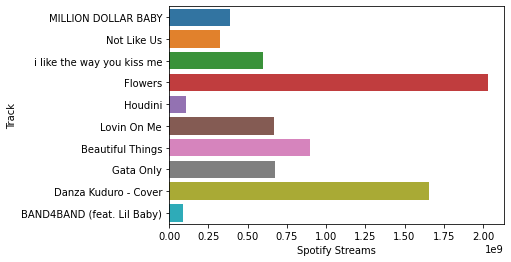

In [32]:
sns.barplot(data=top10_ranked_songs, y='Track', x='Spotify Streams')

It seems that Top 10 ranked songs doesn't relate to how many people streamed it on spotify. 

In [33]:
# What are the top 10 streamed songs on spotify?
top10_spotify_songs = df_cleaned.sort_values(by=['Spotify Streams'], ascending=False).iloc[:10, [0,1,2,3,7]]
top10_spotify_songs

,Track,Album Name,Artist,Release Date,Spotify Streams
55,Blinding Lights,Blinding Lights,The Weeknd,2019-11-29,4281468720
4254,Blinding Lights,Blinding Lights,xSyborg,2021-03-13,4261328190
53,Shape of You,Shape of You,Ed Sheeran,2017-01-06,3909458734
1637,Shape of You,Shape of You,xSyborg,2021-02-20,3888356417
132,Someone You Loved,Breach,Lewis Capaldi,2018-11-08,3427498835
114,Sunflower - Spider-Man: Into the Spider-Verse,Sunflower (Spider-Man: Into the Spider-Verse),Post Malone,2018-10-18,3358704125
19,As It Was,As It Was,Harry Styles,2022-03-31,3301814535
3406,As It Was,As It Was (Official Video),Harry Styles,2022-03-31,3299082422
262,Starboy,Starboy,The Weeknd,2016-09-22,3291262413
519,One Dance,One Dance (feat. Wizkid & Kyla) - Single,Drake,2016-04-04,3192204066


<AxesSubplot:xlabel='Spotify Streams', ylabel='Track'>

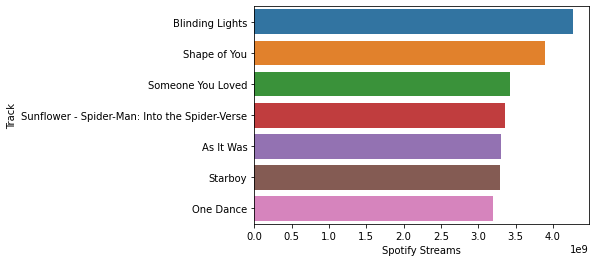

In [34]:
sns.barplot(data=top10_spotify_songs, y='Track', x='Spotify Streams', ci=False)

None of the top ranked songs of 2024 appear on the most streamed spotify list

In [35]:
# What are the top 10 viewed songs on YouTube
top10_viewed_youtube = df_cleaned.sort_values(by=['YouTube Views'], ascending=False).iloc[:10, [0,1,2,3,11]]
top10_viewed_youtube

,Track,Album Name,Artist,Release Date,YouTube Views
27,Baby Shark,ýýýýýýýýý ýýýýýý ýýýýýýýýýýýý,Pinkfong,2015-12-01,16322756555
49,Despacito,Despacito (Featuring Daddy Yankee),Luis Fonsi,2017-01-13,9537135721
53,Shape of You,Shape of You,Ed Sheeran,2017-01-06,8013997219
14,bathroom floor,bathroom floor,Kids With Buns,2022-10-07,6736502312
80,Perfect,ýý (Deluxe),Ed Sheeran,2017-03-03,6473698897
250,See You Again (feat. Charlie Puth),See You Again (feat. Charlie Puth),Wiz Khalifa,2015-01-01,6335989683
649,Gangnam Style (ï¿½ï¿½ï¿½ï¿½ï¿½ï,Hits For Kids 29,PSY,2012-01-01,5849588091
253,Uptown Funk,Full Circle: The Live Anthology,Mark Ronson,2011-11-20,5644117304
1136,Axel F,Best of Crazy Hits,Crazy Frog,2009-12-11,5049428366
291,Dame Tu Cosita,Dame Tu Cosita,El Chombo,2018-04-23,5004189392


<AxesSubplot:xlabel='YouTube Views', ylabel='Track'>

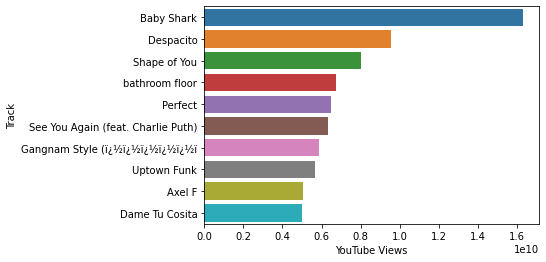

In [36]:
sns.barplot(data=top10_viewed_youtube, y='Track', x='YouTube Views')

In [37]:
# Which tracks appear the most in Spotify playlists?
df_playlist_appearance = df_cleaned.sort_values(by='Spotify Playlist Count', ascending=False).iloc[:10, [0, 2, 3, 7, 8]]
df_playlist_appearance

,Track,Artist,Release Date,Spotify Streams,Spotify Playlist Count
55,Blinding Lights,The Weeknd,2019-11-29,4281468720,590392
70,Heat Waves,Glass Animals,2020-06-29,2996181078,486278
26,STAY (with Justin Bieber),The Kid LAROI,2021-07-09,3107100349,451732
815,Sweater Weather,The Neighbourhood,2012-01-01,2916412507,415650
4522,Smells Like Teen Spirit,Nirvana,1991-09-24,2021910364,410054
19,As It Was,Harry Styles,2022-03-31,3301814535,407119
956,No Role Modelz,J. Cole,2014-12-09,2235160830,403355
3225,Without Me,Eminem,2002-01-01,2146682342,397228
114,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,2018-10-18,3358704125,392082
552,goosebumps,Travis Scott,2016-09-16,2396737761,381756


In [38]:
# How do streaming numbers compare on Spotify compare to other platforms
df_platform_stream = df_cleaned[['Track', 'Artist', 'Spotify Streams', 'YouTube Views', 'Pandora Streams', 'Soundcloud Streams']]
df_platform_stream

,Track,Artist,Spotify Streams,YouTube Views,Pandora Streams,Soundcloud Streams
0,MILLION DOLLAR BABY,Tommy Richman,390470936,84274754,18004655,4818457
1,Not Like Us,Kendrick Lamar,323703884,116347040,7780028,6623075
2,i like the way you kiss me,Artemas,601309283,122599116,5022621,7208651
3,Flowers,Miley Cyrus,2031280633,1096100899,190260277,0
4,Houdini,Eminem,107034922,77373957,4493884,207179
...,...,...,...,...,...,...
4595,For the Last Time,$uicideboy$,305049963,149247747,20104066,50633006
4596,Dil Meri Na Sune,Atif Aslam,52282360,943920245,0,0
4597,Grace (feat. 42 Dugg),Lil Baby,189972685,201027333,84426740,0
4598,Nashe Si Chadh Gayi,Arijit Singh,145467020,1118595159,6817840,0


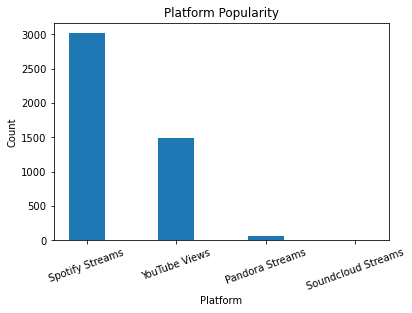

3017 1483 58 10


In [39]:
# Count which platform each track has the highest streams
spotify_count = 0
youtube_count = 0
pandora_count = 0
soundcloud_count = 0

# I am not going to check if there are the same number of streams that occur in multiple platforms since that is not likely    
for index, row in df_platform_stream.iterrows():
    if row['Spotify Streams'] > row['YouTube Views'] and row['Spotify Streams'] > row['Pandora Streams'] and row['Spotify Streams'] > row['Soundcloud Streams']:
        spotify_count += 1
    elif row['YouTube Views'] > row['Spotify Streams'] and row['YouTube Views'] > row['Pandora Streams'] and row['YouTube Views'] > row['Soundcloud Streams']:
        youtube_count += 1
    elif row['Pandora Streams'] > row['Spotify Streams'] and row['Pandora Streams'] > row['YouTube Views'] and row['Pandora Streams'] > row['Soundcloud Streams']:
        pandora_count += 1
    elif row['Soundcloud Streams'] > row['Spotify Streams'] and row['Soundcloud Streams'] > row['YouTube Views'] and row['Soundcloud Streams'] > row['Pandora Streams']:
        soundcloud_count += 1

# Create the bar plot 
x = df_platform_stream.columns.tolist()[2:]
y = [spotify_count, youtube_count, pandora_count, soundcloud_count]

plt.bar(x, y, width=0.4)

plt.xlabel('Platform')
plt.xticks(rotation=20)
plt.ylabel('Count')
plt.title('Platform Popularity')
plt.show()

print(spotify_count, youtube_count, pandora_count, soundcloud_count)

No brainer that Spotify is the platform where songs are most streamed followed by YouTube. However, Pandora and Soundcloud are still used today by others.

<AxesSubplot:xlabel='Spotify Playlist Reach', ylabel='Spotify Streams'>

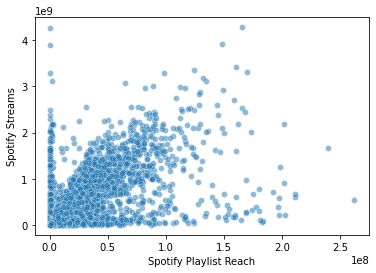

In [40]:
# What is the correlation bewteen Spotify playlist reach and Spotify streams?
sns.scatterplot(data=df_cleaned, x='Spotify Playlist Reach', y='Spotify Streams', alpha=0.5)

There is a slight trend that when Spotify playlist reach increases then Spotify streams also increases. When songs are put into Spotify playlist it increases the chances for the song to be heard, obviously. Other factors like artist popularity, controversy, and more are also factors that affect Spotify streams.

<AxesSubplot:xlabel='YouTube Likes', ylabel='YouTube Views'>

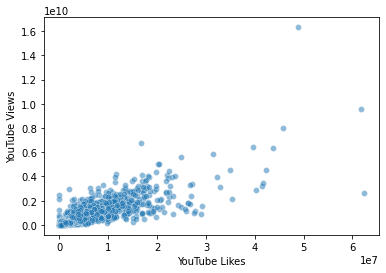

In [41]:
# What is the correlation between Youtube likes and views?
sns.scatterplot(data=df_cleaned, y='YouTube Views', x='YouTube Likes', alpha=0.5)

If a song gets more likes it will get more views.

<AxesSubplot:xlabel='TikTok Likes', ylabel='TikTok Views'>

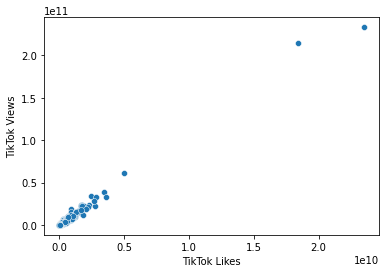

In [46]:
# Correlation between TikTok likes and views
sns.scatterplot(data=df_cleaned, x='TikTok Likes', y='TikTok Views')

The more likes the song gets on TikTok the more views it will get. More and more people on TikTok will use the song as a background song for their videos.

<AxesSubplot:xlabel='TikTok Posts', ylabel='TikTok Views'>

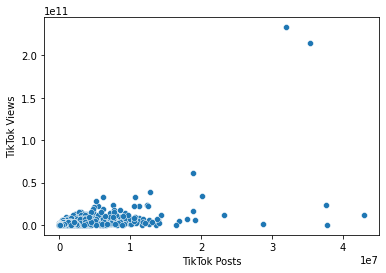

In [43]:
# Correlation between TikTok posts and views
sns.scatterplot(data=df_cleaned, x='TikTok Posts', y='TikTok Views')

<AxesSubplot:xlabel='Spotify Streams', ylabel='TikTok Posts'>

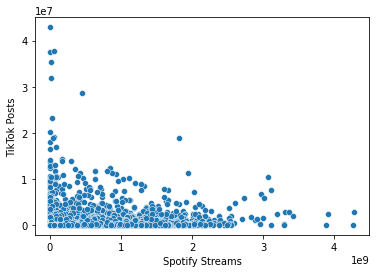

In [44]:
# What is the correlation Tiktok posts and Spotify streams
sns.scatterplot(data=df_cleaned, y='TikTok Posts', x='Spotify Streams')

A lot of songs used on TikTok end up known as TikTok songs and the popularity rises. However, the amount of Spotify streams does not correlate to the amount of TikTok posts.